# Visualization with Seaborn
Matplotlib has proven to be an incredibly useful and popular visualization tool, but
even avid users will admit it often leaves much to be desired. There are several valid
complaints about Matplotlib that often come up:

• Prior to version 2.0, Matplotlib’s defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.   
• Matplotlib’s API is relatively low level. Doing sophisticated statistical visualiza‐
tion is possible, but often requires a lot of boilerplate code.  
• Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas DataFrames. In order to visualize data from a Pandas DataFrame, you must extract each Series and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the
DataFrame labels in a plot.

**An answer to these problems is Seaborn. Seaborn provides an API on top of Matplot‐
lib that offers sane choices for plot style and color defaults, defines simple high-level
functions for common statistical plot types, and integrates with the functionality pro‐
vided by Pandas DataFrames.**


## Seaborn Versus Matplotlib
Here is an example of a simple random-walk plot in Matplotlib, using its classic plot
formatting and colors.

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [3]:
# Create some data
rng=np.random.RandomState(0)
x=np.linspace(0,10,500)
y=np.cumsum(rng.randn(500,6),0)


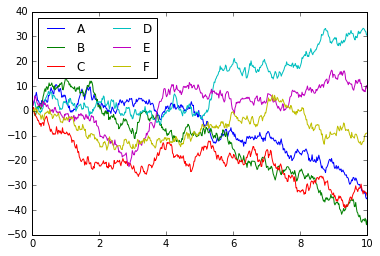

In [4]:
# Plot the data with matplotlib defaults
plt.plot(x,y)
plt.legend('ABCDEF',ncol=2,loc='upper left')

In [5]:
# same plot in seaborn
import seaborn as sns
sns.set()

/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


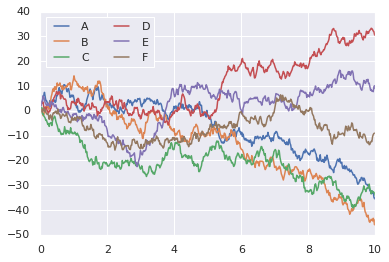

In [6]:
plt.plot(x,y)
plt.legend("ABCDEF",ncol=2, loc='upper left')

## Exploring Seaborn Plots
The main idea of Seaborn is that it provides high-level commands to create a variety
of plot types useful for statistical data exploration, and even some statistical model
fitting.
Let’s take a look at a few of the datasets and plot types available in Seaborn. Note that
all of the following could be done using raw Matplotlib commands (this is, in fact,
what Seaborn does under the hood), but the Seaborn API is much more convenient.

### Histograms, KDE, and densities
Often in statistical data visualization, all you want is to plot histograms and joint dis‐
tributions of variables. We have seen that this is relatively straightforward in Matplot‐
lib

In [7]:
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]],size=2000)
data=pd.DataFrame(data, columns=['x','y'])
data

,x,y
0,0.420092,0.105161
1,2.044777,1.026617
2,-1.261928,-1.494656
3,0.128635,-0.325055
4,3.904799,3.171264
...,...,...
1995,-0.178514,1.548575
1996,0.955042,1.257125
1997,2.291002,1.886572
1998,3.443788,0.881850


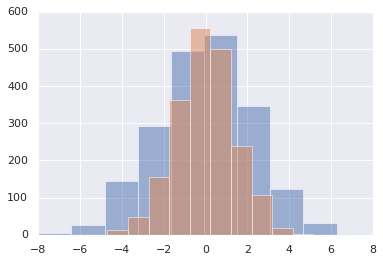

In [13]:
for col in 'xy':
    plt.hist(data[col],alpha=0.5)

**Rather than a histogram, we can get a smooth estimate of the distribution using a
kernel density estimation, which Seaborn does with sns.kdeplot**

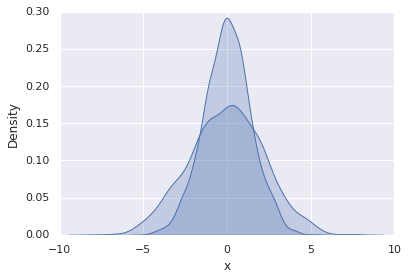

In [14]:
for col in 'xy':
    sns.kdeplot(data[col],shade=True)

**Histograms and KDE can be combined using distplot**

/home/qalmaqihir/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


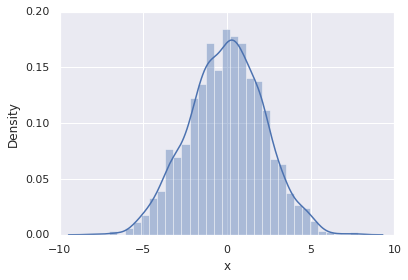

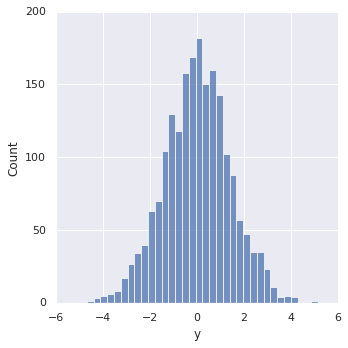

In [19]:
sns.distplot(data['x'])
sns.displot(data['y'])

**If we pass the full two-dimensional dataset to kdeplot, we will get a two-dimensional
visualization of the data**

In [25]:
sns.kdeplot(data);

ValueError: If using all scalar values, you must pass an index